In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
!pip install livelossplot

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2022-01-11 10:42:16.683954: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
2022-01-11 10:42:17.336106: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libnvinfer.so.7
2022-01-11 10:42:17.337170: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libnvinfer_plugin.so.7


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2841985871081131634
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4042794004028119934
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 1113204093914466289
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14842344244
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13893733103764233266
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


2022-01-11 10:42:17.834201: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-01-11 10:42:17.834982: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562f1bba90a0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-11 10:42:17.835003: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-01-11 10:42:17.839799: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-01-11 10:42:18.683843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-11 10:42:18.684568: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562f1ba13250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-01-1

## load the data

### action

In [12]:
# last column in action_filttune is the origin in filttune

action_CST_400 = np.loadtxt('data/action_in_CST_matrix_rand_seed400.csv',delimiter=',')
action_filttune_full_400 = np.loadtxt('data/action_in_filttune_matrix_19_seed400.csv',delimiter=',')

action_CST_500 = np.loadtxt('data/action_in_CST_matrix_rand_seed500.csv',delimiter=',')
action_filttune_full_500 = np.loadtxt('data/action_in_filttune_matrix_19_seed500.csv',delimiter=',')

action_CST_600 = np.loadtxt('data/action_in_CST_matrix_rand_seed600.csv',delimiter=',')
action_filttune_full_600 = np.loadtxt('data/action_in_filttune_matrix_19_seed600.csv',delimiter=',')

action_CST_700 = np.loadtxt('data/action_in_CST_matrix_rand_seed700.csv',delimiter=',')
action_filttune_full_700 = np.loadtxt('data/action_in_filttune_matrix_19_seed700.csv',delimiter=',')

action_CST_800 = np.loadtxt('data/action_in_CST_matrix_rand_seed800.csv',delimiter=',')
action_filttune_full_800 = np.loadtxt('data/action_in_filttune_matrix_19_seed800.csv',delimiter=',')

action_CST_900 = np.loadtxt('data/action_in_CST_matrix_rand_seed900.csv',delimiter=',')
action_filttune_full_900 = np.loadtxt('data/action_in_filttune_matrix_19_seed900.csv',delimiter=',')

action_CST_1000 = np.loadtxt('data/action_in_CST_matrix_rand_seed1000.csv',delimiter=',')
action_filttune_full_1000 = np.loadtxt('data/action_in_filttune_matrix_19_seed1000.csv',delimiter=',')

action_CST_1100 = np.loadtxt('data/action_in_CST_matrix_rand_seed1100.csv',delimiter=',')
action_filttune_full_1100 = np.loadtxt('data/action_in_filttune_matrix_19_seed1100.csv',delimiter=',')

action_CST_1200 = np.loadtxt('data/action_in_CST_matrix_rand_seed1200.csv',delimiter=',')
action_filttune_full_1200 = np.loadtxt('data/action_in_filttune_matrix_19_seed1200.csv',delimiter=',')

action_CST_1300 = np.loadtxt('data/action_in_CST_matrix_rand_seed1300.csv',delimiter=',')
action_filttune_full_1300 = np.loadtxt('data/action_in_filttune_matrix_19_seed1300.csv',delimiter=',')

action_CST_1300F012mm = np.loadtxt('data/action_in_CST_matrix_rand_seed1300F012mm.csv',delimiter=',')
action_filttune_full_1300F012mm = np.loadtxt('data/action_in_filttune_matrix_19_seed1300F012mm.csv',delimiter=',')

In [13]:
action_filttune_400 = action_filttune_full_400[:,0:5372]

action_filttune_500 = action_filttune_full_500[:,0:3201]
action_filttune_600  = action_filttune_full_600[:,0:3636]

action_filttune_700 = action_filttune_full_700[:,0:855]
action_filttune_800 = action_filttune_full_800[:,0:482]

action_filttune_900  = action_filttune_full_900[:,0:1083]
action_filttune_1000 = action_filttune_full_1000[:,0:1068]
action_filttune_1100 = action_filttune_full_1100[:,0:2910]
action_filttune_1200 = action_filttune_full_1200[:,0:3878]
action_filttune_1300 = action_filttune_full_1300[:,0:4802]
action_filttune_1300F012mm = action_filttune_full_1300[:,0:4347]

## load the RMSE data

In [14]:
#load the RMSE data.
#1st row: rmse; 2nd row: mrse
RMS_400  = np.loadtxt('data/RMS_seed400.csv',delimiter=',')
RMS_500  = np.loadtxt('data/RMS_seed500.csv',delimiter=',')
RMS_600  = np.loadtxt('data/RMS_seed600.csv',delimiter=',')
RMS_700  = np.loadtxt('data/RMS_seed700.csv',delimiter=',')
RMS_800  = np.loadtxt('data/RMS_seed800.csv',delimiter=',')
RMS_900  = np.loadtxt('data/RMS_seed900.csv',delimiter=',')
RMS_1000 = np.loadtxt('data/RMS_seed1000.csv',delimiter=',')
RMS_1100 = np.loadtxt('data/RMS_seed1100.csv',delimiter=',')
RMS_1200 = np.loadtxt('data/RMS_seed1200.csv',delimiter=',')
RMS_1300 = np.loadtxt('data/RMS_seed1300.csv',delimiter=',')
RMS_1300F012mm = np.loadtxt('data/RMS_seed1300F012mm.csv',delimiter=',')

In [10]:
from tensorflow.keras.models import Sequential,load_model, clone_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.losses import MeanAbsolutePercentageError
import tensorflow as tf

from livelossplot import PlotLossesKeras

from tensorflow.keras.models import Sequential,load_model, clone_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2, l1, l1_l2

from livelossplot import PlotLossesKeras

2022-01-26 11:12:45.184274: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
2022-01-26 11:12:45.848137: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libnvinfer.so.7
2022-01-26 11:12:45.849327: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libnvinfer_plugin.so.7


## Complete_small dataset

### Select the data with RMSE<0.09

In [15]:
index_400 = range(action_CST_400.shape[1])
temp_400 = RMS_400[0,:]>0.04
to_delete_400 = index_400*temp_400
to_delete_400 = [i for i in to_delete_400 if i != 0]

index_500 = range(action_CST_500.shape[1])
temp_500 = RMS_500[0,:]>0.09
to_delete_500 = index_500*temp_500
to_delete_500 = [i for i in to_delete_500 if i != 0]

index_600 = range(action_CST_600.shape[1])
temp_600 = RMS_600[0,:]>0.09
to_delete_600 = index_600*temp_600
to_delete_600 = [i for i in to_delete_600 if i != 0]

index_700 = range(action_CST_700.shape[1])
temp_700 = RMS_700[0,:]>0.09
to_delete_700 = index_700*temp_700
to_delete_700 = [i for i in to_delete_700 if i != 0]

index_800 = range(action_CST_800.shape[1])
temp_800 = RMS_800[0,:]>0.09
to_delete_800 = index_800*temp_800
to_delete_800 = [i for i in to_delete_800 if i != 0]

index_900 = range(action_CST_900.shape[1])
temp_900 = RMS_900[0,:]>0.09
to_delete_900 = index_900*temp_900
to_delete_900 = [i for i in to_delete_900 if i != 0]

index_1000 = range(action_CST_1000.shape[1])
temp_1000 = RMS_1000[0,:]>0.09
to_delete_1000 = index_1000*temp_1000
to_delete_1000 = [i for i in to_delete_1000 if i != 0]

index_1100 = range(action_CST_1100.shape[1])
temp_1100 = RMS_1100[0,:]>0.09
to_delete_1100 = index_1100*temp_1100
to_delete_1100 = [i for i in to_delete_1100 if i != 0]

index_1200 = range(action_CST_1200.shape[1])
temp_1200 = RMS_1200[0,:]>0.09
to_delete_1200 = index_1200*temp_1200
to_delete_1200 = [i for i in to_delete_1200 if i != 0]

index_1300 = range(action_CST_1300.shape[1])
temp_1300 = RMS_1300[0,:]>0.09
to_delete_1300 = index_1300*temp_1300
to_delete_1300 = [i for i in to_delete_1300 if i != 0]

index_1300F012mm = range(action_CST_1300F012mm.shape[1])
temp_1300F012mm = RMS_1300F012mm[0,:]>0.09
to_delete_1300F012mm = index_1300F012mm*temp_1300F012mm
to_delete_1300F012mm = [i for i in to_delete_1300F012mm if i != 0]

In [16]:
action_CST_400_small  = np.delete(action_CST_400, to_delete_400,  axis=1)
action_CST_500_small  = np.delete(action_CST_500, to_delete_500,  axis=1)
action_CST_600_small  = np.delete(action_CST_600, to_delete_600,  axis=1)
action_CST_700_small  = np.delete(action_CST_700, to_delete_700,  axis=1)
action_CST_800_small  = np.delete(action_CST_800, to_delete_800,  axis=1)
action_CST_900_small  = np.delete(action_CST_900, to_delete_900,  axis=1)
action_CST_1000_small = np.delete(action_CST_1000, to_delete_1000,  axis=1)
action_CST_1100_small = np.delete(action_CST_1100, to_delete_1100,  axis=1)
action_CST_1200_small = np.delete(action_CST_1200, to_delete_1200,  axis=1)
action_CST_1300_small = np.delete(action_CST_1300, to_delete_1300,  axis=1)
action_CST_1300F012mm_small = np.delete(action_CST_1300F012mm, to_delete_1300F012mm,  axis=1)

action_filttune_400_small   = np.delete(action_filttune_400, to_delete_400,  axis=1)
action_filttune_500_small   = np.delete(action_filttune_500, to_delete_500,  axis=1)
action_filttune_600_small   = np.delete(action_filttune_600, to_delete_600,  axis=1)
action_filttune_700_small   = np.delete(action_filttune_700, to_delete_700,  axis=1)
action_filttune_800_small   = np.delete(action_filttune_800, to_delete_800,  axis=1)
action_filttune_900_small   = np.delete(action_filttune_900, to_delete_900,  axis=1)
action_filttune_1000_small  = np.delete(action_filttune_1000, to_delete_1000,  axis=1)
action_filttune_1100_small  = np.delete(action_filttune_1100, to_delete_1100,  axis=1)
action_filttune_1200_small  = np.delete(action_filttune_1200, to_delete_1200,  axis=1)
action_filttune_1300_small  = np.delete(action_filttune_1300, to_delete_1300,  axis=1)
action_filttune_1300F012mm_small  = np.delete(action_filttune_1300F012mm, to_delete_1300F012mm,  axis=1)

### complete_small dataset + seed600

In [16]:
a_CST_small_600 = np.concatenate((action_CST_500_small,action_CST_600_small,action_CST_900_small,
                              action_CST_1000_small,action_CST_1100_small),axis = 1)
a_filttune_small_600 = np.concatenate((action_filttune_500_small,action_filttune_600_small,action_filttune_900_small, 
                                   action_filttune_1000_small, action_filttune_1100_small),axis = 1)

In [17]:
a_CST_small_600.shape

(19, 9472)

In [246]:
action_CST_600_small.shape

(19, 3407)

In [247]:
9472 - 3407

6065

In [12]:
X_train_small_600, X_test_small_600, y_train_small_600, y_test_small_600 = train_test_split( 
     a_filttune_small_600.transpose(),a_CST_small_600.transpose(), random_state=1,train_size = 0.8)

In [13]:
X_train_small_600.shape

(7577, 19)

##### so far the best

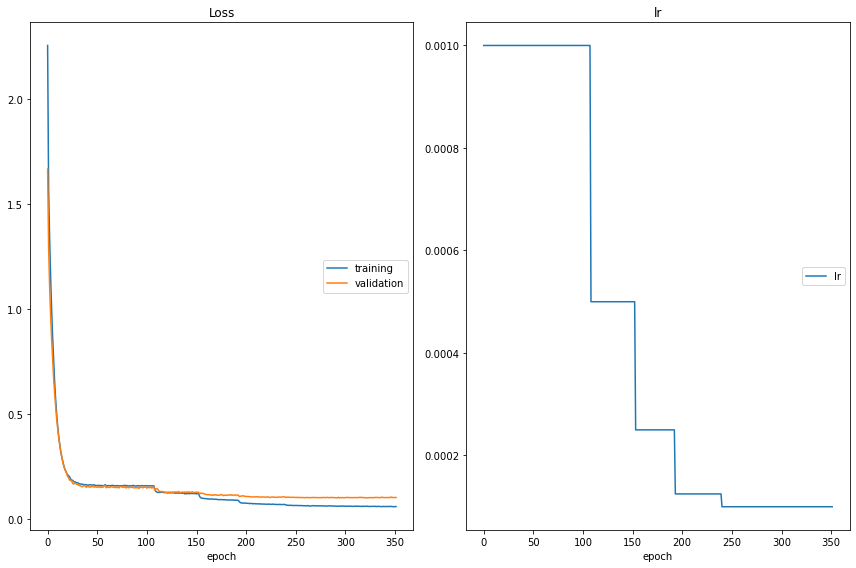

Loss
	training         	 (min:    0.059, max:    2.256, cur:    0.060)
	validation       	 (min:    0.101, max:    1.668, cur:    0.103)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
7577/7577 [==============================] - 1s 131us/sample - loss: 0.0600 - val_loss: 0.1033


In [14]:
# Set the input shape
input_shape = (19,)

# Create the model
model_small_600_0 = Sequential()
model_small_600_0.add(Dense(500, input_shape=input_shape, activation='relu', 
                        kernel_regularizer=regularizers.l2(0.001)))
model_small_600_0.add(Dropout(0.1))
model_small_600_0.add(BatchNormalization())
model_small_600_0.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_small_600_0.add(Dropout(0.1))
model_small_600_0.add(BatchNormalization())
model_small_600_0.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_small_600_0.add(Dropout(0.1))
model_small_600_0.add(BatchNormalization())
model_small_600_0.add(Dense(19, activation='linear', kernel_regularizer=regularizers.l2(0.001)))

# Configure the model and start training
model_small_600_0.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=15, min_lr=0.0001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model/model_comp_small_600_0.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras(), earlyStop]

model_small_600_0.fit(X_train_small_600, y_train_small_600, epochs=3000, 
                  batch_size = 144, verbose=1, validation_data = (X_test_small_600,y_test_small_600), #validation_split=0.2,
                  callbacks=callbacks_list)

In [2]:
model_small_600_0 = load_model('model/model_comp_small_600_0.h5')

NameError: name 'load_model' is not defined

In [15]:
y_train_predict_small_600 = model_small_600_0.predict(X_train_small_600)
y_test_predict_small_600 = model_small_600_0.predict(X_test_small_600)

In [16]:
mse_train_small_600 = metrics.mean_squared_error(y_train_small_600, y_train_predict_small_600)
mse_test_small_600 = metrics.mean_squared_error(y_test_small_600, y_test_predict_small_600)

r2_train_small_600 = r2_score(y_train_small_600, y_train_predict_small_600)
r2_test_small_600 = r2_score(y_test_small_600, y_test_predict_small_600)

mape_train_small_600 = metrics.mean_absolute_percentage_error(y_train_small_600, y_train_predict_small_600)
mape_test_small_600 = metrics.mean_absolute_percentage_error(y_test_small_600, y_test_predict_small_600)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_small_600))
print('MSE test is {}'.format(mse_test_small_600))
print('R2 train is {}'.format(r2_train_small_600))
print('R2 test is {}'.format(r2_test_small_600))
print('MAPE train is {}'.format(mape_train_small_600))
print('MAPE test is {}'.format(mape_test_small_600))

The model performance for testing set
--------------------------------------
MSE train is 0.017286005845301464
MSE test is 0.08765630293707001
R2 train is 0.9662844745349514
R2 test is 0.8651369763334641
MAPE train is 0.9366151217052245
MAPE test is 1.2042878452067673


### prepare test on CST, find the index of the samples.

In [66]:
golden_CST = np.array([0.627372, 0.849978, 0.950813, 0.875983, 0.866188, 1.03133, 0.671715, 0.085633, 1.69804,
                       0.508077, 0.803913, 1.08792, -0.844056, -0.484051, 1.71896, 0, 0, 0, 0]);

In [67]:
golden_CST

array([ 0.627372,  0.849978,  0.950813,  0.875983,  0.866188,  1.03133 ,
        0.671715,  0.085633,  1.69804 ,  0.508077,  0.803913,  1.08792 ,
       -0.844056, -0.484051,  1.71896 ,  0.      ,  0.      ,  0.      ,
        0.      ])

In [183]:
ind = 7;

In [184]:
y_test_small_ST[ind,:]

array([ 0.15704189, -0.23534068, -0.06720491, -0.19276768,  0.18334969,
        0.09458983,  0.05500544, -0.1129678 , -0.33580196, -0.87521861,
        0.94439408,  1.50751945, -0.65318208, -0.12683603, -0.32761229,
        0.56764009, -0.32459171,  0.6794746 ,  0.45085609])

In [185]:
y_test_predict_small_ST[ind,:]

array([ 0.14451201, -0.23533073, -0.06515764, -0.16322616,  0.15760031,
        0.07041339,  0.09362824, -0.10721166, -0.22624314, -0.8886745 ,
        1.0374012 ,  1.5743588 , -0.71647966, -0.14572237, -0.3954083 ,
        0.6286045 , -0.3268634 ,  0.44944522,  0.41624132], dtype=float32)

In [186]:
# Predicted CST screw position
np.set_printoptions(suppress=True)
y_test_predict_small_ST[ind,:] + golden_CST

array([ 0.77188401,  0.61464727,  0.88565536,  0.71275684,  1.02378831,
        1.10174339,  0.76534324, -0.02157866,  1.47179686, -0.3805975 ,
        1.8413142 ,  2.66227882, -1.56053566, -0.62977337,  1.3235517 ,
        0.62860447, -0.32686341,  0.44944522,  0.41624132])

In [187]:
y_test_small_ST[ind,:] + golden_CST

array([ 0.78441389,  0.61463732,  0.88360809,  0.68321532,  1.04953769,
        1.12591983,  0.72672044, -0.0273348 ,  1.36223804, -0.36714161,
        1.74830708,  2.59543945, -1.49723808, -0.61088703,  1.39134771,
        0.56764009, -0.32459171,  0.6794746 ,  0.45085609])

In [136]:
tmp = action_filttune_1200.transpose()[:,0] == X_test_small_ST[ind,0]
sum(tmp)

1

In [137]:
# find the specific action index in data
tmp = action_filttune_1200.transpose()[:,0] == X_test_small_ST[ind,0]
index = 0
for i in tmp:
    if i == False:
        index += 1
        continue
    else:
        print(index)

1008


In [ ]:
0  seed600, 321
1      600,  1978
2      600,   779
3      1200,  2845
4      1200,  1154
5      1200, 3291
6,     600,  2492
7,     1200,  1008

In [249]:
 - 1479.76 - 740

-2219.76

### complete_small dataset + seed600/1200

In [27]:
action_CST_1200_small.shape

(19, 3749)

In [28]:
a_CST_small_612 = np.concatenate((action_CST_500_small,action_CST_600_small,action_CST_900_small,
                              action_CST_1000_small,action_CST_1100_small,action_CST_1200_small),axis = 1)
a_filttune_small_612 = np.concatenate((action_filttune_500_small,action_filttune_600_small,action_filttune_900_small, 
                                   action_filttune_1000_small, action_filttune_1100_small,action_filttune_1200_small),axis = 1)

In [29]:
a_CST_small_612.shape

(19, 13221)

In [31]:
action_CST_1200_small.shape

(19, 3749)

In [33]:
X_train_small_612, X_test_small_612, y_train_small_612, y_test_small_612 = train_test_split( 
     a_filttune_small_612.transpose(),a_CST_small_612.transpose(), random_state=1,train_size = 0.8)

In [172]:
13221-7156

6065

##### so far the best

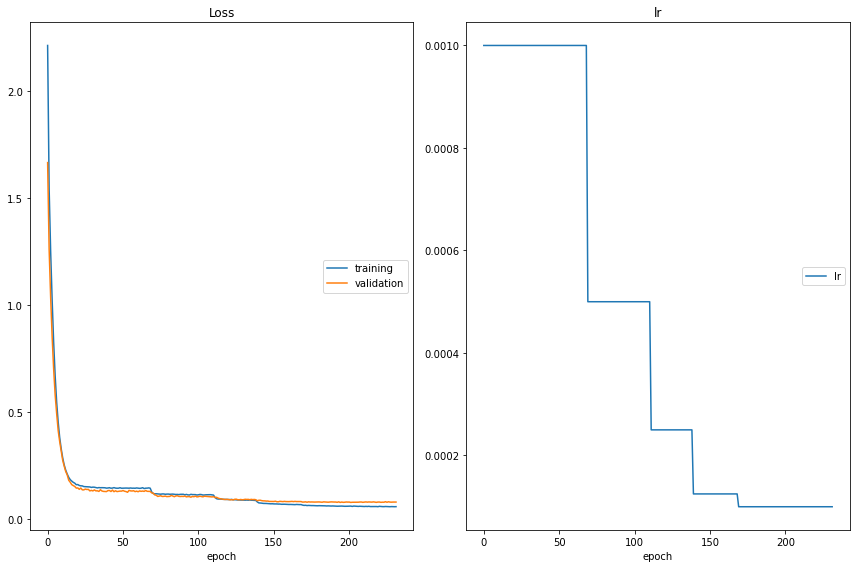

Loss
	training         	 (min:    0.058, max:    2.215, cur:    0.059)
	validation       	 (min:    0.079, max:    1.668, cur:    0.080)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
10576/10576 [==============================] - 1s 60us/sample - loss: 0.0589 - val_loss: 0.0803


In [45]:
# Set the input shape
input_shape = (19,)

# Create the model
model_small_612_0 = Sequential()
model_small_612_0.add(Dense(600, input_shape=input_shape, activation='relu', 
                        kernel_regularizer=regularizers.l2(0.001)))
model_small_612_0.add(Dropout(0.1))
model_small_612_0.add(BatchNormalization())
model_small_612_0.add(Dense(600, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_small_612_0.add(Dropout(0.1))
model_small_612_0.add(BatchNormalization())
model_small_612_0.add(Dense(600, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_small_612_0.add(Dropout(0.1))
model_small_612_0.add(BatchNormalization())
model_small_612_0.add(Dense(19, activation='linear', kernel_regularizer=regularizers.l2(0.001)))

# Configure the model and start training
model_small_612_0.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=15, min_lr=0.0001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model/model_comp_small_612_0.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras(), earlyStop]

model_small_612_0.fit(X_train_small_612, y_train_small_612, epochs=3000, 
                  batch_size = 144, verbose=1, validation_data = (X_test_small_612,y_test_small_612), #validation_split=0.2,
                  callbacks=callbacks_list)

In [46]:
y_train_predict_small_612 = model_small_612_0.predict(X_train_small_612)
y_test_predict_small_612 = model_small_612_0.predict(X_test_small_612)

In [47]:
mse_train_small_612 = metrics.mean_squared_error(y_train_small_612, y_train_predict_small_612)
mse_test_small_612 = metrics.mean_squared_error(y_test_small_612, y_test_predict_small_612)

r2_train_small_612 = r2_score(y_train_small_612, y_train_predict_small_612)
r2_test_small_612 = r2_score(y_test_small_612, y_test_predict_small_612)

mape_train_small_612 = metrics.mean_absolute_percentage_error(y_train_small_612, y_train_predict_small_612)
mape_test_small_612 = metrics.mean_absolute_percentage_error(y_test_small_612, y_test_predict_small_612)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_small_612))
print('MSE test is {}'.format(mse_test_small_612))
print('R2 train is {}'.format(r2_train_small_612))
print('R2 test is {}'.format(r2_test_small_612))
print('MAPE train is {}'.format(mape_train_small_612))
print('MAPE test is {}'.format(mape_test_small_612))

The model performance for testing set
--------------------------------------
MSE train is 0.021673537235306677
MSE test is 0.0653228122270577
R2 train is 0.9588016568733145
R2 test is 0.8975980413391781
MAPE train is 0.9683283608447679
MAPE test is 1.0420216058870542


### Only good samples, small dataset: seed600+1200

In [27]:
action_CST_1200_small.shape

(19, 3749)

In [48]:
#ST for small tolerance
a_CST_small_ST = np.concatenate((action_CST_600_small,action_CST_1200_small),axis = 1)
a_filttune_small_ST = np.concatenate((action_filttune_600_small,action_filttune_1200_small),axis = 1)

In [49]:
a_CST_small_ST.shape

(19, 7156)

In [50]:
X_train_small_ST, X_test_small_ST, y_train_small_ST, y_test_small_ST = train_test_split( 
     a_filttune_small_ST.transpose(),a_CST_small_ST.transpose(), random_state=1,train_size = 0.8)

In [51]:
X_train_small_ST.shape

(5724, 19)

##### so far the best

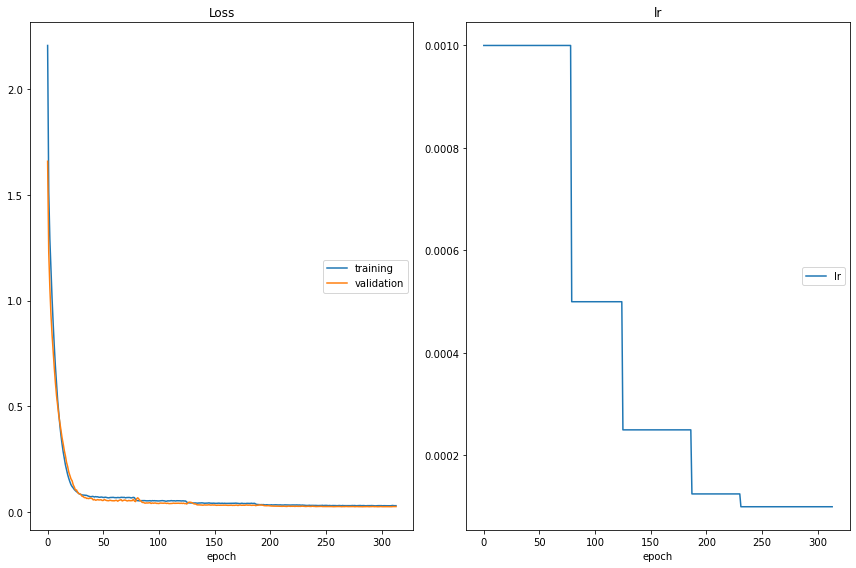

Loss
	training         	 (min:    0.028, max:    2.208, cur:    0.029)
	validation       	 (min:    0.024, max:    1.660, cur:    0.024)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
5724/5724 [==============================] - 0s 81us/sample - loss: 0.0286 - val_loss: 0.0244


In [52]:
# Set the input shape
input_shape = (19,)

# Create the model
model_small_ST_0 = Sequential()
model_small_ST_0.add(Dense(500, input_shape=input_shape, activation='relu', 
                        kernel_regularizer=regularizers.l2(0.001)))
model_small_ST_0.add(Dropout(0.1))
model_small_ST_0.add(BatchNormalization())
model_small_ST_0.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_small_ST_0.add(Dropout(0.1))
model_small_ST_0.add(BatchNormalization())
model_small_ST_0.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_small_ST_0.add(Dropout(0.1))
model_small_ST_0.add(BatchNormalization())
model_small_ST_0.add(Dense(19, activation='linear', kernel_regularizer=regularizers.l2(0.001)))

# Configure the model and start training
model_small_ST_0.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=15, min_lr=0.0001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model/model_comp_small_ST_0.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras(), earlyStop]

model_small_ST_0.fit(X_train_small_ST, y_train_small_ST, epochs=3000, 
                  batch_size = 144, verbose=1, validation_data = (X_test_small_ST,y_test_small_ST), #validation_split=0.2,
                  callbacks=callbacks_list)

In [53]:
y_train_predict_small_ST = model_small_ST_0.predict(X_train_small_ST)
y_test_predict_small_ST = model_small_ST_0.predict(X_test_small_ST)

In [54]:
mse_train_small_ST = metrics.mean_squared_error(y_train_small_ST, y_train_predict_small_ST)
mse_test_small_ST = metrics.mean_squared_error(y_test_small_ST, y_test_predict_small_ST)

r2_train_small_ST = r2_score(y_train_small_ST, y_train_predict_small_ST)
r2_test_small_ST = r2_score(y_test_small_ST, y_test_predict_small_ST)

mape_train_small_ST = metrics.mean_absolute_percentage_error(y_train_small_ST, y_train_predict_small_ST)
mape_test_small_ST = metrics.mean_absolute_percentage_error(y_test_small_ST, y_test_predict_small_ST)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_small_ST))
print('MSE test is {}'.format(mse_test_small_ST))
print('R2 train is {}'.format(r2_train_small_ST))
print('R2 test is {}'.format(r2_test_small_ST))
print('MAPE train is {}'.format(mape_train_small_ST))
print('MAPE test is {}'.format(mape_test_small_ST))

The model performance for testing set
--------------------------------------
MSE train is 0.00680869854567449
MSE test is 0.01817550383967238
R2 train is 0.9766256836692984
R2 test is 0.9511346286531162
MAPE train is 0.7200067758430678
MAPE test is 0.9004777843957446


In [55]:
y_test_predict_small_ST[7,:]

array([ 0.14451201, -0.23533073, -0.06515764, -0.16322616,  0.15760031,
        0.07041339,  0.09362824, -0.10721166, -0.22624314, -0.8886745 ,
        1.0374012 ,  1.5743588 , -0.71647966, -0.14572237, -0.3954083 ,
        0.6286045 , -0.3268634 ,  0.44944522,  0.41624132], dtype=float32)

In [56]:
y_test_small_ST[7,:]

array([ 0.15704189, -0.23534068, -0.06720491, -0.19276768,  0.18334969,
        0.09458983,  0.05500544, -0.1129678 , -0.33580196, -0.87521861,
        0.94439408,  1.50751945, -0.65318208, -0.12683603, -0.32761229,
        0.56764009, -0.32459171,  0.6794746 ,  0.45085609])

## Only small tol data 600, 1200, 1300

In [10]:
a_CST_small_ST13 = np.concatenate((action_CST_600_small,action_CST_1200_small,action_CST_1300_small),axis = 1)
a_filttune_small_ST13 = np.concatenate((action_filttune_600_small,action_filttune_1200_small,action_filttune_1300_small),axis = 1)

In [11]:
a_CST_small_ST13.shape

(19, 11767)

In [12]:
X_train_small_ST13, X_test_small_ST13, y_train_small_ST13, y_test_small_ST13 = train_test_split( 
     a_filttune_small_ST13.transpose(),a_CST_small_ST13.transpose(), random_state=1,train_size = 0.8)

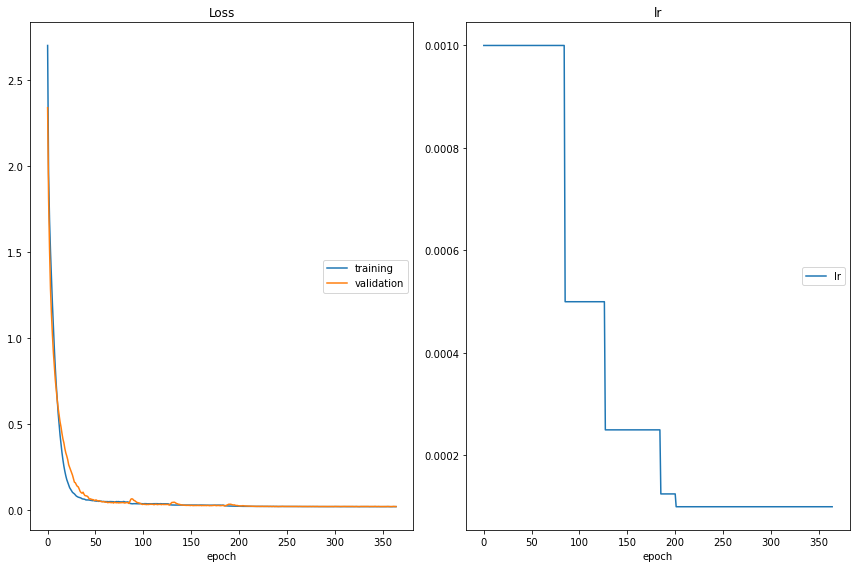

Loss
	training         	 (min:    0.019, max:    2.699, cur:    0.019)
	validation       	 (min:    0.019, max:    2.337, cur:    0.019)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
9413/9413 [==============================] - 0s 49us/sample - loss: 0.0190 - val_loss: 0.0194


In [13]:
# Set the input shape
input_shape = (19,)

# Create the model
model_small_ST13_0 = Sequential()
model_small_ST13_0.add(Dense(700, input_shape=input_shape, activation='relu', 
                        kernel_regularizer=regularizers.l2(0.001)))
model_small_ST13_0.add(Dropout(0.1))
model_small_ST13_0.add(BatchNormalization())
model_small_ST13_0.add(Dense(700, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_small_ST13_0.add(Dropout(0.1))
model_small_ST13_0.add(BatchNormalization())
model_small_ST13_0.add(Dense(700, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_small_ST13_0.add(Dropout(0.1))
model_small_ST13_0.add(BatchNormalization())
model_small_ST13_0.add(Dense(19, activation='linear', kernel_regularizer=regularizers.l2(0.001)))

# Configure the model and start training
model_small_ST13_0.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=15, min_lr=0.0001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model/model_comp_small_ST13_0.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras(), earlyStop]

model_small_ST13_0.fit(X_train_small_ST13, y_train_small_ST13, epochs=3000, 
                  batch_size = 400, verbose=1, validation_data = (X_test_small_ST13,y_test_small_ST13), #validation_split=0.2,
                  callbacks=callbacks_list)

In [14]:
y_train_predict_small_ST13 = model_small_ST13_0.predict(X_train_small_ST13)
y_test_predict_small_ST13 = model_small_ST13_0.predict(X_test_small_ST13)

In [15]:
y_test_predict_small_ST13.shape

(2354, 19)

In [16]:
type(y_test_predict_small_ST13)

numpy.ndarray

In [46]:
mse_train_small_ST13 = metrics.mean_squared_error(y_train_small_ST13, y_train_predict_small_ST13)
mse_test_small_ST13 = metrics.mean_squared_error(y_test_small_ST13, y_test_predict_small_ST13)

r2_train_small_ST13 = r2_score(y_train_small_ST13, y_train_predict_small_ST13)
r2_test_small_ST13 = r2_score(y_test_small_ST13, y_test_predict_small_ST13)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_small_ST13))
print('MSE test is {}'.format(mse_test_small_ST13))
print('R2 train is {}'.format(r2_train_small_ST13))
print('R2 test is {}'.format(r2_test_small_ST13))

The model performance for testing set
--------------------------------------
MSE train is 0.004749334422484404
MSE test is 0.014270199674081047
R2 train is 0.9827651219928872
R2 test is 0.9630696136889348


## Only 1300F012mm

In [18]:
a_CST_small_1300F012mm = action_CST_1300F012mm_small
a_filttune_small_1300F012mm = action_filttune_1300F012mm_small

In [19]:
a_CST_small_1300F012mm.shape

(19, 4283)

In [20]:
X_train_small_1300F012mm, X_test_small_1300F012mm, y_train_small_1300F012mm, y_test_small_1300F012mm = train_test_split( 
     a_filttune_small_1300F012mm.transpose(),a_CST_small_1300F012mm.transpose(), random_state=1,train_size = 0.8)

In [ ]:
# so far best hyperpara [700,700,700], l2 reg = 0.002, patience in reduce_lc 50, patience in early stop 70
# batch_size = 400

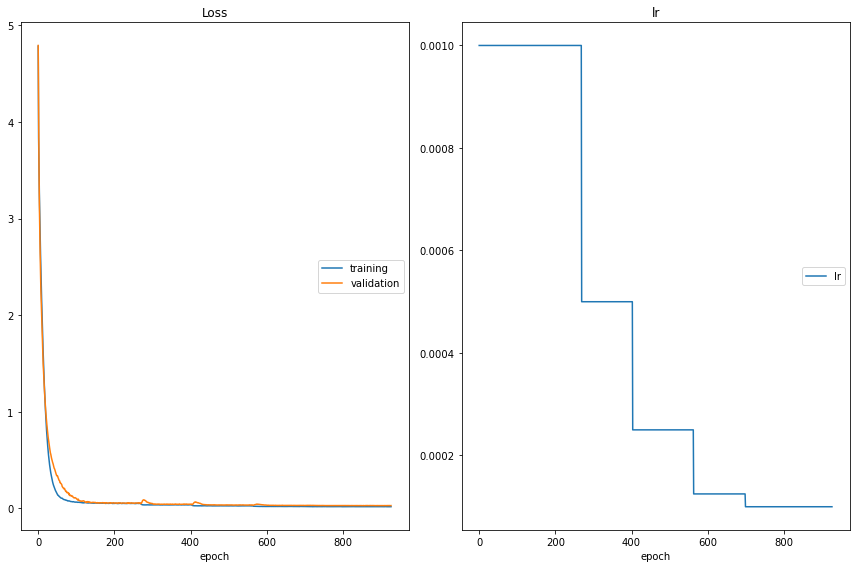

Loss
	training         	 (min:    0.017, max:    4.786, cur:    0.017)
	validation       	 (min:    0.028, max:    4.793, cur:    0.029)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
3426/3426 [==============================] - 0s 82us/sample - loss: 0.0175 - val_loss: 0.0290


In [74]:
# Set the input shape
input_shape = (19,)

# Create the model
model_small_1300F012mm_0 = Sequential()
model_small_1300F012mm_0.add(Dense(700, input_shape=input_shape, activation='relu', 
                        kernel_regularizer=regularizers.l2(0.002)))
model_small_1300F012mm_0.add(Dropout(0.1))
model_small_1300F012mm_0.add(BatchNormalization())
model_small_1300F012mm_0.add(Dense(700, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model_small_1300F012mm_0.add(Dropout(0.1))
model_small_1300F012mm_0.add(BatchNormalization())
model_small_1300F012mm_0.add(Dense(700, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model_small_1300F012mm_0.add(Dropout(0.1))
model_small_1300F012mm_0.add(BatchNormalization())
model_small_1300F012mm_0.add(Dense(19, activation='linear', kernel_regularizer=regularizers.l2(0.002)))

# Configure the model and start training
model_small_1300F012mm_0.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=50, min_lr=0.0001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model/model_comp_small_1300F012mm_0.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=70)
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras(), earlyStop]

model_small_1300F012mm_0.fit(X_train_small_1300F012mm, y_train_small_1300F012mm, epochs=3000, 
                  batch_size = 400, verbose=1, validation_data = (X_test_small_1300F012mm,y_test_small_1300F012mm), #validation_split=0.2,
                  callbacks=callbacks_list)

In [75]:
y_train_predict_small_1300F012mm = model_small_1300F012mm_0.predict(X_train_small_1300F012mm)
y_test_predict_small_1300F012mm = model_small_1300F012mm_0.predict(X_test_small_1300F012mm)

In [47]:
y_test_predict_small_1300F012mm.shape

(857, 19)

In [16]:
type(y_test_predict_small_ST13)

numpy.ndarray

In [76]:
mse_train_small_1300F012mm = metrics.mean_squared_error(y_train_small_1300F012mm, y_train_predict_small_1300F012mm)
mse_test_small_1300F012mm = metrics.mean_squared_error(y_test_small_1300F012mm, y_test_predict_small_1300F012mm)

r2_train_small_1300F012mm = r2_score(y_train_small_1300F012mm, y_train_predict_small_1300F012mm)
r2_test_small_1300F012mm = r2_score(y_test_small_1300F012mm, y_test_predict_small_1300F012mm)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_small_1300F012mm))
print('MSE test is {}'.format(mse_test_small_1300F012mm))
print('R2 train is {}'.format(r2_train_small_1300F012mm))
print('R2 test is {}'.format(r2_test_small_1300F012mm))


The model performance for testing set
--------------------------------------
MSE train is 0.0036304849129537246
MSE test is 0.023013226988419167
R2 train is 0.9674788014568123
R2 test is 0.9187071844088475
